# Data extract through AIP and Preprocessing 

In [1]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'RDW63LUED9U3S55M'
symbol = 'RELIANCE.BSE'

def get_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data
def prepare_data(data):
    data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

data = get_stock_data(symbol,api_key)
df = prepare_data(data)



In [2]:
df =df.reset_index()
df


,date,Open,High,Low,Close,Volume
0,2024-02-08,2895.6001,2919.7500,2856.7000,2902.9500,98849.0
1,2024-02-07,2870.0000,2898.0000,2858.4500,2883.3999,320512.0
2,2024-02-06,2887.3999,2887.3999,2840.8000,2856.8000,115081.0
3,2024-02-05,2921.2000,2940.0000,2864.0000,2877.0500,128072.0
4,2024-02-02,2864.4500,2949.8999,2864.4500,2914.7500,653622.0
...,...,...,...,...,...,...
4703,2005-01-07,359.8269,373.1159,359.5202,368.5840,16969845.0
4704,2005-01-06,357.7824,365.6195,356.1468,358.4297,13446517.0
4705,2005-01-05,358.1230,363.9158,351.8194,361.1217,16954266.0
4706,2005-01-04,364.5972,371.3782,360.8491,361.7351,10059943.0


In [3]:
# Assuming 'df' is your DataFrame containing the stock data

# Add a new column 'Market_High_Indicator' to indicate if the market high was reached
df['Market_High_Indicator'] = (df['High'] > df['Close'].shift(1)).astype(int)

# Display the DataFrame with the new column
print(df)


           date       Open       High        Low      Close      Volume  \
0    2024-02-08  2895.6001  2919.7500  2856.7000  2902.9500     98849.0   
1    2024-02-07  2870.0000  2898.0000  2858.4500  2883.3999    320512.0   
2    2024-02-06  2887.3999  2887.3999  2840.8000  2856.8000    115081.0   
3    2024-02-05  2921.2000  2940.0000  2864.0000  2877.0500    128072.0   
4    2024-02-02  2864.4500  2949.8999  2864.4500  2914.7500    653622.0   
...         ...        ...        ...        ...        ...         ...   
4703 2005-01-07   359.8269   373.1159   359.5202   368.5840  16969845.0   
4704 2005-01-06   357.7824   365.6195   356.1468   358.4297  13446517.0   
4705 2005-01-05   358.1230   363.9158   351.8194   361.1217  16954266.0   
4706 2005-01-04   364.5972   371.3782   360.8491   361.7351  10059943.0   
4707 2005-01-03   354.4090   371.0715   354.4090   370.1173  11842921.0   

      Market_High_Indicator  
0                         0  
1                         0  
2        

In [4]:
df.head()

,date,Open,High,Low,Close,Volume,Market_High_Indicator
0,2024-02-08,2895.6001,2919.7500,2856.70,2902.9500,98849.0,0
1,2024-02-07,2870.0000,2898.0000,2858.45,2883.3999,320512.0,0
2,2024-02-06,2887.3999,2887.3999,2840.80,2856.8000,115081.0,1
3,2024-02-05,2921.2000,2940.0000,2864.00,2877.0500,128072.0,1
4,2024-02-02,2864.4500,2949.8999,2864.45,2914.7500,653622.0,1


# Data Analysis and Visualization

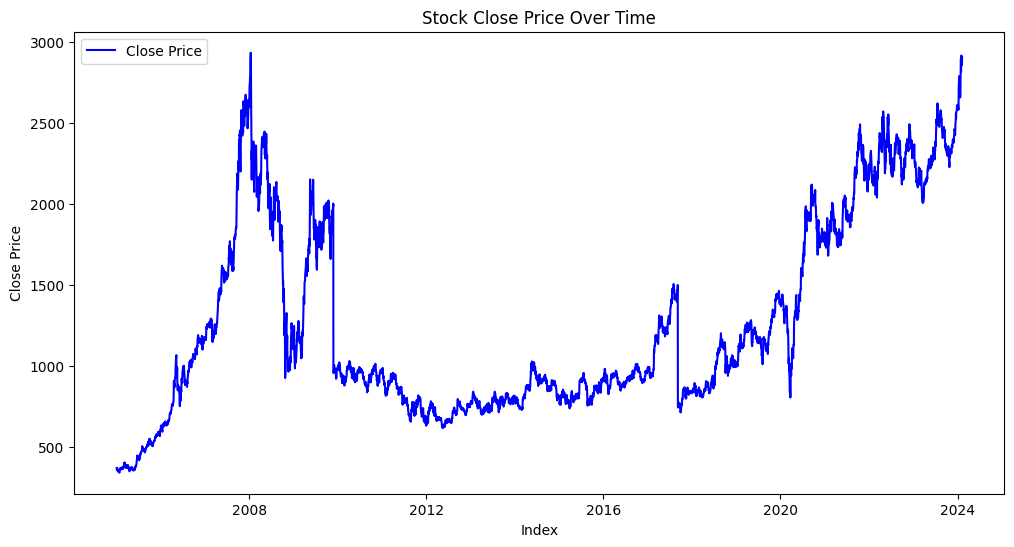

In [5]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [6]:
df.describe()

,date,Open,High,Low,Close,Volume,Market_High_Indicator
count,4708,4708.000000,4708.000000,4708.000000,4708.000000,4.708000e+03,4708.000000
mean,2014-07-22 00:43:25.947323648,1268.814708,1285.184391,1252.046889,1268.113529,2.981169e+06,0.741079
min,2005-01-03 00:00:00,344.152500,347.798500,339.518500,341.699200,0.000000e+00,0.000000
25%,2009-10-13 12:00:00,823.192300,830.120675,812.287125,822.064225,4.218022e+05,0.000000
50%,2014-07-16 12:00:00,989.084250,1002.804200,975.364400,988.058750,8.698080e+05,1.000000
75%,2019-05-07 06:00:00,1805.006700,1826.190775,1775.185550,1800.859125,2.540924e+06,1.000000
max,2024-02-08 00:00:00,2931.768100,2964.677700,2864.450000,2932.041700,8.021841e+08,1.000000
std,NaN,606.678792,614.877593,598.711635,606.803088,2.070018e+07,0.438089


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4708 non-null   datetime64[ns]
 1   Open                   4708 non-null   float64       
 2   High                   4708 non-null   float64       
 3   Low                    4708 non-null   float64       
 4   Close                  4708 non-null   float64       
 5   Volume                 4708 non-null   float64       
 6   Market_High_Indicator  4708 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 257.6 KB


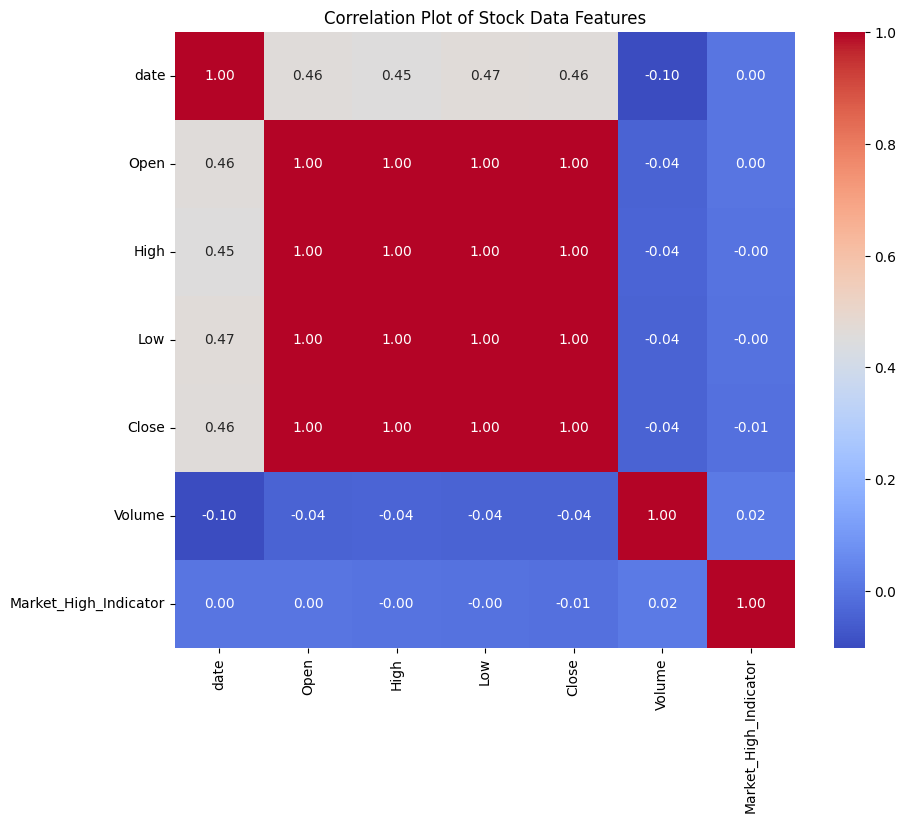

In [8]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [9]:
df.head()

,date,Open,High,Low,Close,Volume,Market_High_Indicator
0,2024-02-08,2895.6001,2919.7500,2856.70,2902.9500,98849.0,0
1,2024-02-07,2870.0000,2898.0000,2858.45,2883.3999,320512.0,0
2,2024-02-06,2887.3999,2887.3999,2840.80,2856.8000,115081.0,1
3,2024-02-05,2921.2000,2940.0000,2864.00,2877.0500,128072.0,1
4,2024-02-02,2864.4500,2949.8999,2864.45,2914.7500,653622.0,1


# Model training

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Market_High_Indicator', 'High', 'date'])
y = df['Market_High_Indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3766, 4)
X_test shape: (942, 4)
y_train shape: (3766,)
y_test shape: (942,)


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with feature_range=(0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

# Predict and Evaluate the Model

In [14]:
# Predict on the scaled test data
predictions = model.predict(X_test_scaled)


In [15]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7388535031847133


# Predict Next day Market

In [17]:
# Extract the last row of the DataFrame
last_row = df.iloc[-1]

# Extract the relevant features (excluding 'High') and reshape into the format expected by your model
# X_new = np.array([[937.70, 918.70, 937.70, 924.45, 380102.0]])
X_new = last_row[['Open', 'Low', 'Close', 'Volume']].values.reshape(1, -1)

# Scale the new feature data using the same scaler used for training
X_new_scaled = scaler.transform(X_new)

# Predict the next day's high price
next_day_high = model.predict(X_new_scaled)

print("Predicted next day's price:", next_day_high)


Predicted next day's high price: [1]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
